###### Дипломная работа по курсу «Python для анализа данных»
   
1.	Загрузить файл hr.csv (можно найти во сложении к заданию)
2.	Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)
3.	Рассчитать и визуализировать корреляционную матрицу для переменных
4.	Визуализировать несколько взаимосвязей между переменными
5.	С использованием t-test статистики проверить взаимосвязи между несколькими переменными
6.	Рассчитать сколько работников работает в каждом департаменте
7.	Показать распределение сотрудников по зарплатам
8.	Показать распределение сотрудников по зарплатам совместно с департаментами
9.	Сколько сотрудников покинули компанию
10.	Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию
11.	Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в лк на сайте


In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
import seaborn as sns

##### 1. Загрузить файл hr.csv (можно найти во сложении к заданию)

In [8]:
company = pd.read_csv('HR.csv', encoding = "ISO-8859-1")
company.info()
company.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


In [24]:
company.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

##### 2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

###### satisfaction_level

In [11]:
print('Среднее значение уровня удовлетворенности: ',statistics.mean(company['satisfaction_level']))
print('Медиана уровня удовлетворенности: ', statistics.median(company['satisfaction_level']))
print('Мода уровня удовлетворенности: ', statistics.mode(company['satisfaction_level']))
print('Минимальное значение уровня удовлетворенности: ', min(company['satisfaction_level']))
print('Максимальное значение уровня удовлетворенности: ', max(company['satisfaction_level']))
print('Стандартное отклонение уровня удовлетворенности: ', statistics.stdev(company['satisfaction_level']))

Среднее значение уровня удовлетворенности:  0.6128335222348157
Медиана уровня удовлетворенности:  0.64
Мода уровня удовлетворенности:  0.1
Минимальное значение уровня удовлетворенности:  0.09
Максимальное значение уровня удовлетворенности:  1.0
Стандартное отклонение уровня удовлетворенности:  0.24863065106114257


###### last_evaluation

In [213]:
print('Среднее значение последних оценок: ',statistics.mean(company['last_evaluation']))
print('Медиана последних оценок: ', statistics.median(company['last_evaluation']))
print('Мода последних оценок: ', statistics.mode(company['last_evaluation']))
print('Минимальное значение последних оценок: ', min(company['last_evaluation']))
print('Максимальное значение последних оценок: ', max(company['last_evaluation']))
print('Стандартное отклонение последних оценок: ', statistics.stdev(company['last_evaluation']))

Среднее значение последних оценок:  0.7161017401160077
Медиана последних оценок:  0.72
Мода последних оценок:  0.55
Минимальное значение последних оценок:  0.36
Максимальное значение последних оценок:  1.0
Стандартное отклонение последних оценок:  0.17116911062327533


###### average_montly_hours

In [46]:
print('Среднее значение  «среднемесячное количество часов»: ',statistics.mean(company['average_montly_hours']))
print('Медиана «среднемесячное количество часов»: ', statistics.median(company['average_montly_hours']))
print('Минимальное значение «среднемесячное количество часов»: ', min(company['average_montly_hours']))
print('Максимальное значение «среднемесячное количество часов»: ', max(company['average_montly_hours']))
print('Стандартное отклонение «среднемесячное количество часов»: ', statistics.stdev(company['average_montly_hours']))

Среднее значение  «среднемесячное количество часов»:  201.0503366891126
Медиана «среднемесячное количество часов»:  200
Минимальное значение «среднемесячное количество часов»:  96
Максимальное значение «среднемесячное количество часов»:  310
Стандартное отклонение «среднемесячное количество часов»:  49.94309937128408


##### time_spend_company

In [214]:
print('Среднее значение стажа в компании: ',statistics.mean(company['time_spend_company']))
print('Медиана стажа в компании: ', statistics.median(company['time_spend_company']))
print('Мода стажа в компании: ', statistics.mode(company['time_spend_company']))
print('Минимальное значение стажа в компании: ', min(company['time_spend_company']))
print('Максимальное значение стажа в компании: ', max(company['time_spend_company']))
print('Стандартное отклонение стажа в компании: ', statistics.stdev(company['time_spend_company']))

Среднее значение стажа в компании:  3.498233215547703
Медиана стажа в компании:  3
Мода стажа в компании:  3
Минимальное значение стажа в компании:  2
Максимальное значение стажа в компании:  10
Стандартное отклонение стажа в компании:  1.4601362305354812


###### Work_accident

In [48]:
print('Среднее значение несчастных случае: ',statistics.mean(company['Work_accident']))
print('Медиана несчастных случае: ', statistics.median(company['Work_accident']))
print('Мода несчастных случае: ', statistics.mode(company['Work_accident']))
print('Минимальное значение несчастных случае: ', min(company['Work_accident']))
print('Максимальное значение несчастных случае: ', max(company['Work_accident']))
print('Стандартное отклонение несчастных случае: ', statistics.stdev(company['Work_accident']))

Среднее значение несчастных случае:  0.1446096406427095
Медиана несчастных случае:  0
Мода несчастных случае:  0
Минимальное значение несчастных случае:  0
Максимальное значение несчастных случае:  1
Стандартное отклонение несчастных случае:  0.35171855238017985


##### 3. Рассчитать и визуализировать корреляционную матрицу для переменных

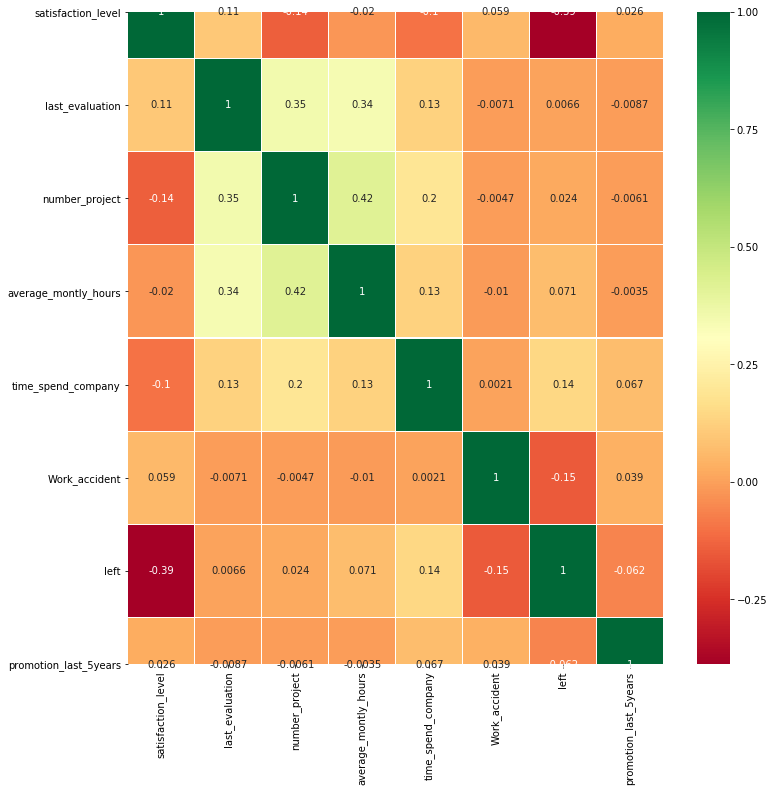

In [53]:
sns.heatmap(company.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Среднемесячное количество часов и номер проекта со средним положительным уровнем корреляции,тогда как увольнения и уровень удовлетворенности со средним отрицательным.

#####  4. Визуализировать несколько взаимосвязей между переменными

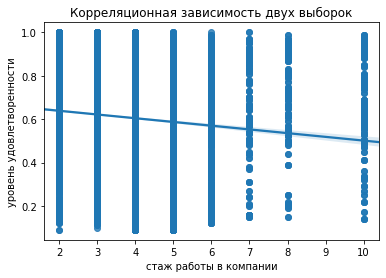

In [175]:
satisfaction_level = company['satisfaction_level']
time_spend_company = company['time_spend_company']
sns.regplot(x= time_spend_company , y = satisfaction_level, data = company , fit_reg=True)
plt.xlabel('стаж работы в компании')
plt.ylabel('уровень удовлетворенности')
plt.title('Корреляционная зависимость двух выборок')
plt.grid(False)
plt.show()

Чем больше стаж работы в компании, тем ниже показатель уровеня удовлетворенности 

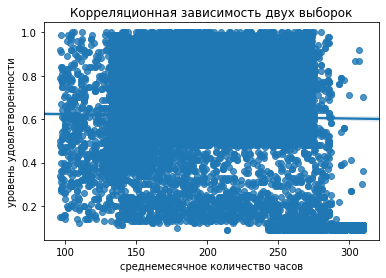

In [180]:
average_montly_hours = company['average_montly_hours']
satisfaction_level = company['satisfaction_level']
sns.regplot(x= average_montly_hours , y = satisfaction_level, data = company , fit_reg=True)
plt.xlabel('среднемесячное количество часов')
plt.ylabel('уровень удовлетворенности')
plt.title('Корреляционная зависимость двух выборок')
plt.grid(False)
plt.show()

Среднемесячное количество часов, проведенных на работе, практически не влияет на уровень удовлетворенности

##### 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными

In [207]:
Work_accident= company['Work_accident']
last_evaluation=company['last_evaluation']
sts.ttest_ind(Work_accident, last_evaluation)

Ttest_indResult(statistic=-178.9323432205496, pvalue=0.0)

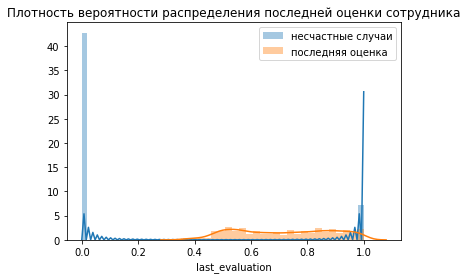

In [208]:
sns.distplot(Work_accident)
sns.distplot(last_evaluation)
plt.title('Плотность вероятности распределения последней оценки сотрудника')
plt.legend(['несчастные случаи', 'последняя оценка'])
plt.show()

Связь минимальна

In [211]:
last_evaluation= company['last_evaluation']
promotion_last_5years=company['promotion_last_5years']
sts.ttest_ind(last_evaluation, promotion_last_5years)

Ttest_indResult(statistic=380.12267324012294, pvalue=0.0)

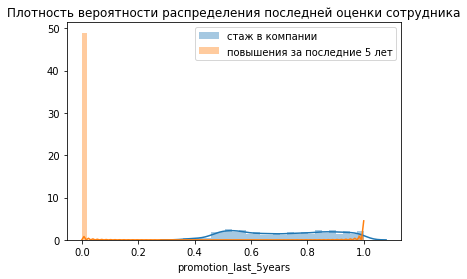

In [212]:
sns.distplot(last_evaluation)
sns.distplot(promotion_last_5years)
plt.title('Плотность вероятности распределения последней оценки сотрудника')
plt.legend(['последняя оценка', 'повышения за последние 5 лет'])
plt.show()

Связи нет

###### 6. Рассчитать сколько работников работает в каждом департаменте

In [113]:
def groupby_(company):
    return company.satisfaction_level.count()

In [114]:
print('Количество работников в департаментах : \n',company.groupby('sales').apply(groupby_))

Количество работников в департаментах : 
 sales
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
dtype: int64


##### 7. Показать распределение сотрудников по зарплатам

In [150]:
company_s = company.groupby(['salary']).apply(groupby_).reset_index()
company_s.columns = ['Уровень з/п', 'Количество сотрудников']
company_s

,Уровень з/п,Количество сотрудников
0,high,1237
1,low,7316
2,medium,6446


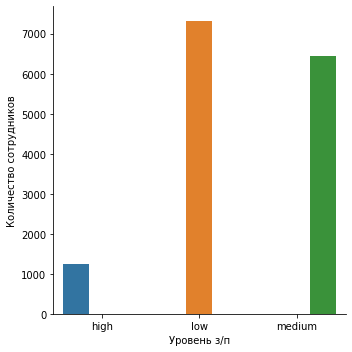

In [155]:
row=company_s['Количество сотрудников']
f = company_s['Уровень з/п']
sns.catplot(x='Уровень з/п', y='Количество сотрудников', hue='Уровень з/п',kind='bar', data=company_s)

#####  8. Показать распределение сотрудников по зарплатам совместно с департаментами

In [119]:
company_salary = company.groupby(['salary','sales']).apply(groupby_).reset_index()
company_salary.columns = ['salary','sales', 'count']
company_salary

,salary,sales,count
0,high,IT,83
1,high,RandD,51
2,high,accounting,74
3,high,hr,45
4,high,management,225
5,high,marketing,80
6,high,product_mng,68
7,high,sales,269
8,high,support,141
9,high,technical,201


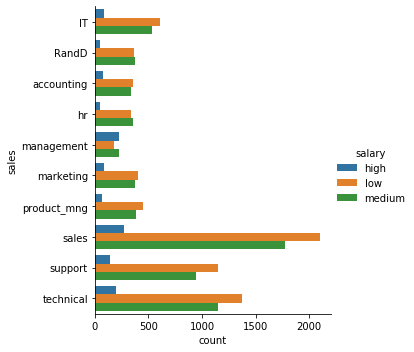

In [132]:
row=company_salary['count']
f = company_salary['salary']
sns.catplot(x='count', y='sales', hue='salary', kind='bar', data=company_salary)

#####  9. Сколько сотрудников покинули компанию

In [88]:
print(sum(company['left']), 'сотрудник покинул компанию')

3571 сотрудников покинули компанию


###### 10.	Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию


###### Гипотеза: увольняются в основном сотрудники, задейственные в одних и тех же проектах

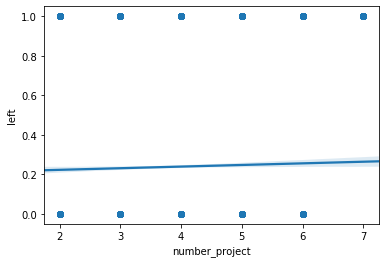

In [187]:
left = company['left']
number_project = company['number_project']
sns.regplot(x=number_project, y=left, data = company)


Гипотеза не подтвердилась. Правда в 7 проекте несколько больше увольнений, чем в остальных.

###### Гипотеза:  Уход сотрудников связан с несчастными случаями на работе

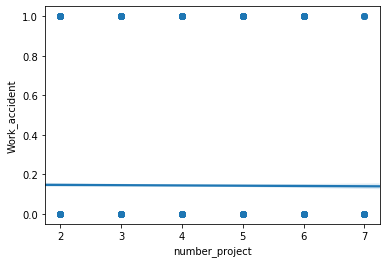

In [191]:
left = company['left']
Work_accident = company['Work_accident']
sns.regplot(x=number_project, y=Work_accident, data = company)

Гипотеза не потдвердилась